Problem Statement: Price Prediction of Used Cars
Description: Develop a predictive model using the used car dataset to accurately estimate the selling price of a used car based on its features such as model, year, mileage, transmission, fuel type, and engine size. The goal is to provide potential buyers and sellers with a reliable estimation of the fair market value of used cars, aiding in informed decision-making.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('used_cars.csv')

In [ ]:
df.head(10)

,Unnamed: 0,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0,VW
1,1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0,VW
2,2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0,VW
3,3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0,VW
4,4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,VW
5,5,T-Roc,2020,31895,Manual,10,Petrol,145,42.2,1.5,VW
6,6,T-Roc,2020,27895,Manual,10,Petrol,145,42.2,1.5,VW
7,7,T-Roc,2020,39495,Semi-Auto,10,Petrol,145,32.5,2.0,VW
8,8,T-Roc,2019,21995,Manual,10,Petrol,145,44.1,1.0,VW
9,9,T-Roc,2019,23285,Manual,10,Petrol,145,42.2,1.5,VW


In [ ]:
df.shape

(33669, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33669 entries, 0 to 33668
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    33669 non-null  int64  
 1   model         33669 non-null  object 
 2   year          33669 non-null  int64  
 3   price         33669 non-null  int64  
 4   transmission  33669 non-null  object 
 5   mileage       33669 non-null  int64  
 6   fuelType      33669 non-null  object 
 7   tax           33669 non-null  int64  
 8   mpg           33668 non-null  float64
 9   engineSize    33668 non-null  float64
 10  Make          33668 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 2.8+ MB


In [ ]:
df.dtypes

Unnamed: 0        int64
model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
Make             object
dtype: object

In [ ]:
df.isnull().sum()

Unnamed: 0      0
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             1
engineSize      1
Make            1
dtype: int64

In [ ]:
df.describe()

,Unnamed: 0,year,price,mileage,tax,mpg,engineSize
count,33669.000000,33669.000000,33669.000000,33669.000000,33669.000000,33668.000000,33668.000000
mean,6524.500342,2017.057234,13477.698714,22747.775342,115.870237,54.118689,1.505444
std,4257.837490,2.096056,6724.580459,20324.587746,62.297325,12.525819,0.381111
min,0.000000,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2805.000000,2016.000000,8995.000000,7982.000000,30.000000,45.600000,1.200000
50%,5977.000000,2017.000000,11790.000000,17733.000000,145.000000,53.300000,1.400000
75%,10185.000000,2019.000000,16491.000000,31994.000000,145.000000,60.100000,1.600000
max,15156.000000,2020.000000,69994.000000,279000.000000,580.000000,235.400000,3.200000


In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)


In [ ]:
df.value_counts()

model           year  price  transmission  mileage  fuelType  tax  mpg   engineSize  Make    
 Astra          2020  14990  Manual        100      Petrol    145  54.3  1.2         vauxhall    46
 Corsa          2019  9990   Manual        100      Petrol    145  43.5  1.4         vauxhall    31
                      10990  Manual        100      Petrol    145  43.5  1.4         vauxhall    28
                2020  16998  Manual        10       Petrol    145  52.3  1.2         vauxhall    19
 Astra          2020  15990  Manual        100      Petrol    145  54.3  1.2         vauxhall    19
                                                                                                 ..
 Golf           2015  12490  Manual        44000    Diesel    20   67.3  2.0         VW           1
                                           38000    Diesel    20   67.3  2.0         VW           1
                                           37000    Diesel    20   67.3  2.0         VW           1
      

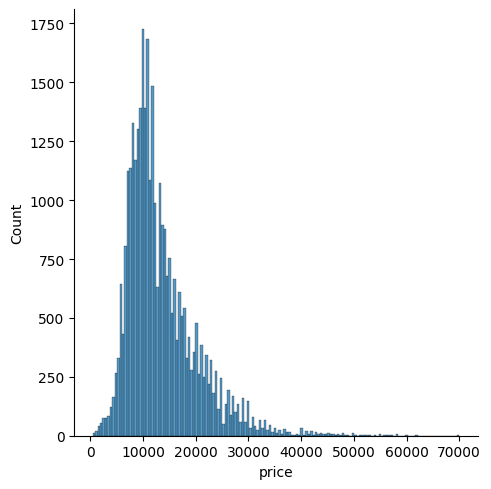

In [ ]:
sns.displot(df['price'])

In [ ]:
df.corr()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
model,1.000000,0.024909,0.155477,0.036100,-0.029737,-0.062102,0.019462,-0.098058,0.083408,-0.345444
year,0.024909,1.000000,0.550036,0.108846,-0.731247,0.056216,0.257601,-0.208499,-0.037539,-0.066840
price,0.155477,0.550036,1.000000,0.221955,-0.453044,-0.291593,0.292257,-0.317756,0.549346,-0.443890
transmission,0.036100,0.108846,0.221955,1.000000,-0.078965,-0.051598,0.069462,-0.141738,0.094191,-0.225832
mileage,-0.029737,-0.731247,-0.453044,-0.078965,1.000000,-0.230672,-0.261099,0.257213,0.152213,0.031926
fuelType,-0.062102,0.056216,-0.291593,-0.051598,-0.230672,1.000000,0.121852,-0.295962,-0.635452,0.228713
tax,0.019462,0.257601,0.292257,0.069462,-0.261099,0.121852,1.000000,-0.578646,0.163980,0.115084
mpg,-0.098058,-0.208499,-0.317756,-0.141738,0.257213,-0.295962,-0.578646,1.000000,-0.156461,-0.076210
engineSize,0.083408,-0.037539,0.549346,0.094191,0.152213,-0.635452,0.163980,-0.156461,1.000000,-0.223294
Make,-0.345444,-0.066840,-0.443890,-0.225832,0.031926,0.228713,0.115084,-0.076210,-0.223294,1.000000


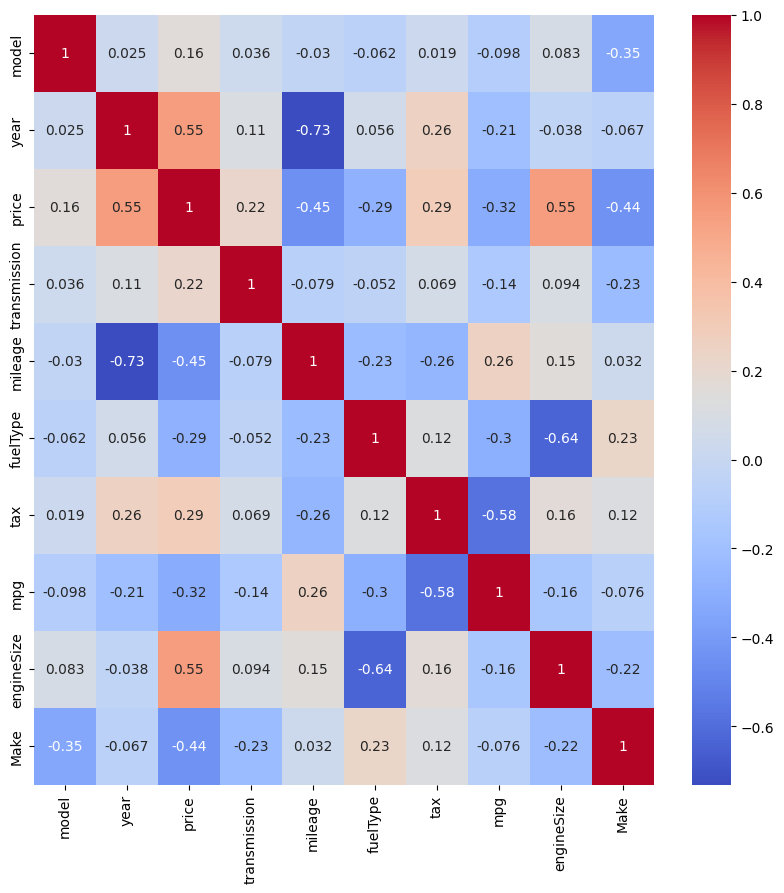

In [ ]:

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Make']=le.fit_transform(df['Make'])
df['model']=le.fit_transform(df['model'])
df['transmission']=le.fit_transform(df['transmission'])
df['fuelType']=le.fit_transform(df['fuelType'])



In [ ]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,42,2019,25000,0,13904,0,145,49.6,2.0,0
1,42,2019,26883,0,4562,0,145,49.6,2.0,0
2,42,2019,20000,1,7414,0,145,50.4,2.0,0
3,42,2019,33492,0,4825,4,145,32.5,2.0,0
4,42,2019,22900,3,6500,4,150,39.8,1.5,0
...,...,...,...,...,...,...,...,...,...,...
33664,8,2019,11400,1,7000,4,145,57.7,1.0,1
33665,8,2016,9895,3,10732,4,0,67.0,1.0,1
33666,8,2017,7395,1,14500,4,0,69.0,1.0,1
33667,8,2019,9995,1,8200,4,145,56.5,1.0,1


In [ ]:
x=df.drop(columns='price')
y=df['price']

In [ ]:
x

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,42,2019,0,13904,0,145,49.6,2.0,0
1,42,2019,0,4562,0,145,49.6,2.0,0
2,42,2019,1,7414,0,145,50.4,2.0,0
3,42,2019,0,4825,4,145,32.5,2.0,0
4,42,2019,3,6500,4,150,39.8,1.5,0
...,...,...,...,...,...,...,...,...,...
33664,8,2019,1,7000,4,145,57.7,1.0,1
33665,8,2016,3,10732,4,0,67.0,1.0,1
33666,8,2017,1,14500,4,0,69.0,1.0,1
33667,8,2019,1,8200,4,145,56.5,1.0,1


In [ ]:
y

0        25000
1        26883
2        20000
3        33492
4        22900
         ...  
33664    11400
33665     9895
33666     7395
33667     9995
33668     6995
Name: price, Length: 33669, dtype: int64

In [ ]:
x.isnull().sum()

model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             1
engineSize      1
Make            0
dtype: int64

In [ ]:
x.fillna(x.mean(), inplace=True)
x.isnull().sum()

model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Make            0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[ 0.49003929, -0.49993027, -0.13657259, ...,  0.46864095,
        -0.80663822, -1.03928012],
       [ 1.6249791 , -0.02523708, -0.13657259, ...,  0.0642831 ,
        -0.54209681,  0.04299361],
       [ 1.05750919, -0.02523708, -0.13657259, ..., -0.43521778,
        -0.2775554 , -1.03928012],
       ...,
       [ 1.05750919, -0.97462346, -0.13657259, ..., -0.07050285,
         1.30969306, -1.03928012],
       [-0.2192981 ,  0.92414931, -0.13657259, ..., -0.36386051,
        -1.33572104, -1.03928012],
       [-0.64490053,  0.44945612, -0.13657259, ...,  0.09599744,
        -0.2775554 ,  1.12526734]])

In [ ]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [ ]:
lm.coef_

array([ -152.27860401,  2307.51783726,   203.15188552, -1568.69723619,
        -119.25111608,   228.68574546,  -771.33785388,  3283.08760958,
       -2119.9222848 ])

In [ ]:
lm_coeff= pd.Series(lm.coef_)
lm_coeff

0    -152.278604
1    2307.517837
2     203.151886
3   -1568.697236
4    -119.251116
5     228.685745
6    -771.337854
7    3283.087610
8   -2119.922285
dtype: float64

<Axes: >

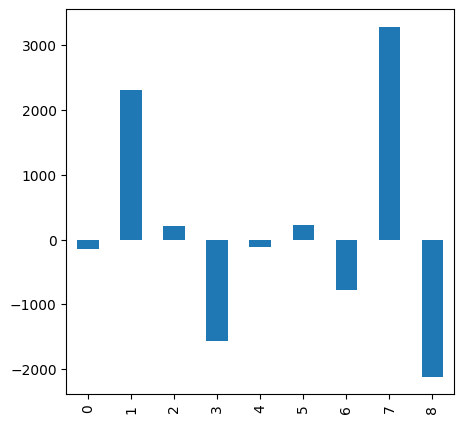

In [ ]:
plt.figure(figsize=(5,5))
lm_coeff.plot(kind='bar')

In [ ]:
from sklearn.linear_model import Lasso
ls= Lasso()
ls.fit(x_train,y_train)

Lasso()

In [ ]:
ls_coeff= pd.Series(ls.coef_)
ls_coeff

0    -150.568761
1    2307.518074
2     202.711249
3   -1567.853757
4    -117.617567
5     228.203740
6    -770.078889
7    3283.453384
8   -2118.592304
dtype: float64

In [ ]:
from sklearn.linear_model import Ridge
rd= Ridge()
rd.fit(x_train,y_train)

Ridge()

In [ ]:
rd_coeff=pd.Series(rd.coef_)

<Axes: >

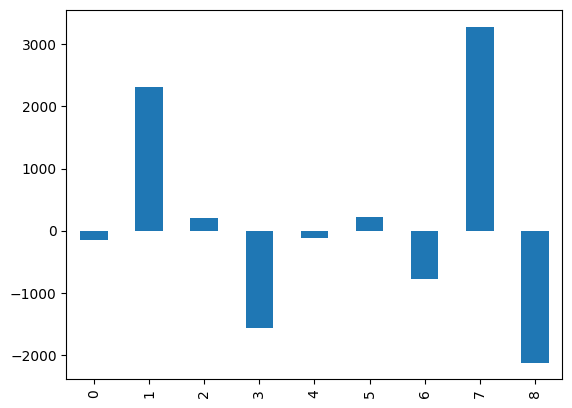

In [ ]:
rd_coeff.plot(kind='bar')

In [ ]:
from sklearn.linear_model import ElasticNet
el= ElasticNet()
el.fit(x_train,y_train)

ElasticNet()

In [ ]:
el_coeff=pd.Series(el.coef_)

<Axes: >

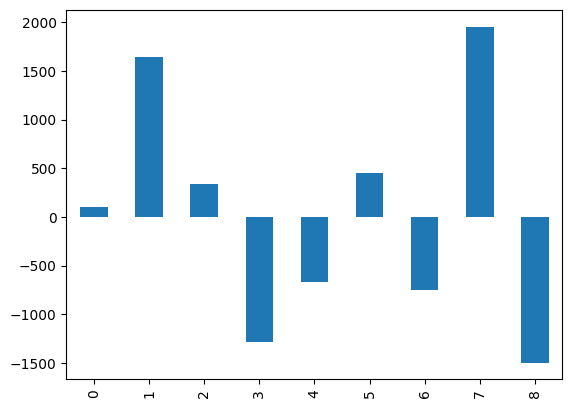

In [ ]:
el_coeff.plot(kind='bar')

In [ ]:
#prediction

pred_lm = lm.predict(x_test)
pred_lm

array([14945.78300077,  5386.57014428, 10170.03452386, ...,
       12000.33096021,  8894.32574807,  8413.15751756])

In [ ]:
pred_ls = ls.predict(x_test)
pred_ls

array([14946.22936767,  5390.32110265, 10173.15576435, ...,
       12000.87893834,  8896.07303244,  8411.93227933])

In [ ]:
pred_rd = rd.predict(x_test)
pred_rd

array([14945.88016519,  5386.8107409 , 10170.30986055, ...,
       12000.43919123,  8894.47586231,  8413.21529829])

In [ ]:
pred_el = el.predict(x_test)
pred_el




array([15189.21137696,  7365.01784194, 11903.6271465 , ...,
       12703.00254194, 10301.43420015,  9207.57027622])

In [ ]:
#R- Squared
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error

#Linear
metrics.r2_score(y_test, pred_lm)

0.764501126086425

In [ ]:
#Lasso
metrics.r2_score(y_test, pred_ls)

0.7644965339267885

In [ ]:
#Ridge

metrics.r2_score(y_test, pred_rd)

0.7645013023148218

In [ ]:
#ElasticNet
metrics.r2_score(y_test, pred_el)

0.7138259765298638

#From above all linear regressions regularizations we conclude that other than that original linear regression is best for accuracy at 76.45%.

In [ ]:
# prompt: apply random forsest

from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
metrics.r2_score(y_test, pred_rf)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
pred_rf = rf.predict(x_test)
pred_rf

array([10208.42583333,  6019.83      ,  7480.87      , ...,
       18564.75      ,  8214.37      ,  7420.6325    ])

In [ ]:
metrics.r2_score(y_test, pred_rf)

0.9514645583678077

#By using random forest it is giving 95.14% accuracy, which shows giving biasedness and variance as it result as nearly overfitting